
Student Id- 700765621

Video link - https://drive.google.com/file/d/1TdMYASt858FVNMcZrPlbqF2rcFh0t088/view?usp=drive_link





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
262/262 - 45s - 174ms/step - accuracy: 0.6378 - loss: 0.8441 - val_accuracy: 0.6806 - val_loss: 0.7774
Epoch 2/5
262/262 - 42s - 159ms/step - accuracy: 0.7019 - loss: 0.7006 - val_accuracy: 0.6613 - val_loss: 0.7801
Epoch 3/5
262/262 - 87s - 331ms/step - accuracy: 0.7331 - loss: 0.6268 - val_accuracy: 0.6699 - val_loss: 0.7936
Epoch 4/5
262/262 - 41s - 156ms/step - accuracy: 0.7563 - loss: 0.5844 - val_accuracy: 0.6656 - val_loss: 0.8085
Epoch 5/5
262/262 - 42s - 160ms/step - accuracy: 0.7716 - loss: 0.5471 - val_accuracy: 0.6677 - val_loss: 0.8181
144/144 - 3s - 21ms/step - accuracy: 0.6723 - loss: 0.7838
Test loss: 0.7838
Test accuracy: 0.6723
Metrics: ['loss', 'compile_metrics']


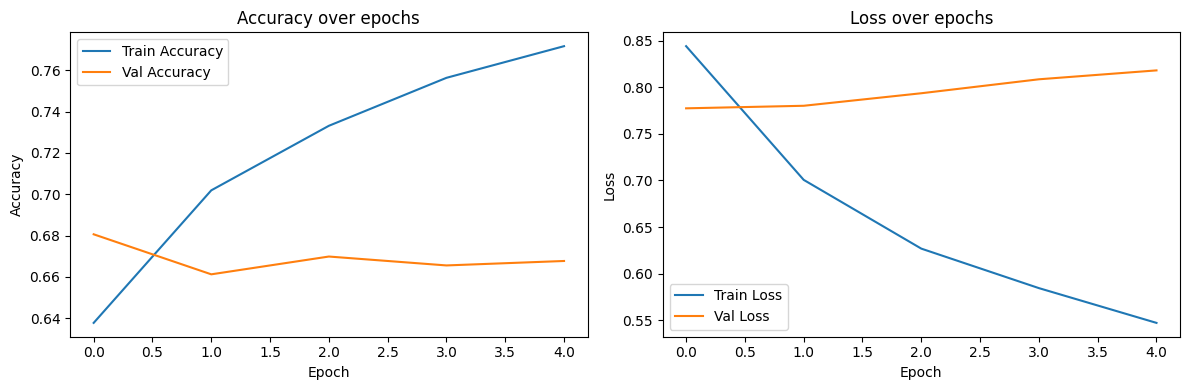

In [ ]:

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# Load the dataset
data = pd.read_csv('Data.csv')

# Drop rows with missing values
data = data[['text', 'sentiment']].dropna()

# Text preprocessing
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
data['text'] = data['text'].apply(lambda x: x.replace('rt', ' '))

# Tokenization
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)
num_classes = y.shape[1]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model parameters
embed_dim = 128
lstm_out = 196
batch_size = 32
epochs = 5

# Model creation
def create_model():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build and train model
model = create_model()
print(model.summary())
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.1)

# Evaluation
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)
print(f'Test loss: {score:.4f}')
print(f'Test accuracy: {acc:.4f}')
print(f'Metrics: {model.metrics_names}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()



**a.**  Execute and save the given model and use the saved model to predict on new text data (ex, “A lot of
good things are happening. We are respected again throughout the world, and that's a great
thing .@realDonaldTrump”)

In [ ]:
import pickle

# Saving the  tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the  model
model.save('sentiment_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load saved model and tokenizer
model = load_model('sentiment_model.h5')
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Sample text
new_text = ["A lot of good things are happening. We are respected again throughout the world, and that's a great thing .@realDonaldTrump"]

# Preprocess text
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.replace('rt', ' ')
    return text

new_text = [clean_text(t) for t in new_text]
seq = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(seq, maxlen=X.shape[1])

# Predict
pred = model.predict(padded)
predicted_class = labelencoder.inverse_transform([pred.argmax()])
print("Predicted Sentiment:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Predicted Sentiment: Positive


**b.** Apply GridSearchCV on the source code provided and produce the results with the best combination.

In [ ]:
# Setup for GridSearchCV
!pip install scikit-learn==1.0.2
!pip install scikeras==0.7.0

!pip install --upgrade scikeras
import sklearn
import scikeras
print(sklearn.__version__)
print(scikeras.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.7.0,<3.11.0; 0.2.0 Requires-Python >=3.6.7,<3.9; 0.2.1 Requires-Python >=3.6.7,<3.9; 0.6.0 Requires-Python >=3.7.0,<3.10.0; 0.6.1 Requires-Python >=3.7.0,<3.10.0; 0.7.0 Requires-Python >=3.7.0,<3.10.0; 0.8.0 Requires-Python >

** GridSearch Code**

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

# Load the dataset
data = pd.read_csv('Data.csv')

# Drop rows with missing values
data = data[['text', 'sentiment']].dropna()

# Text preprocessing
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
data['text'] = data['text'].apply(lambda x: x.replace('rt', ' '))

# Tokenization
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
maxlen = 100  # Define maxlen to avoid issues with variable sequence lengths
X = pad_sequences(X, maxlen=maxlen)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)
num_classes = y.shape[1]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define model function
def build_model(embed_dim=128, lstm_out=196):
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the model using scikeras
keras_model = KerasClassifier(model=build_model, verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'model__embed_dim': [64, 128],
    'model__lstm_out': [64, 128],
    'batch_size': [16, 32],
    'epochs': [3]
}

try:
    grid_result = grid.fit(X_train, Y_train)
except Exception as e:
    print(f"Error during GridSearchCV fitting: {e}")


# Use GridSearchCV to tune hyperparameters
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=2)
# Try fitting the model directly to check for issues
keras_model = build_model(embed_dim=128, lstm_out=128)  # Use a simple configuration
keras_model.fit(X_train, Y_train, epochs=3, batch_size=32, verbose=1)


# Output the best result
print("\n Best GridSearchCV Score: {:.4f}".format(grid_result.best_score_))
print(" Best Parameters:", grid_result.best_params_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
score, acc = best_model.score(X_test, Y_test)
print(f"Test loss: {score:.4f}")
print(f"Test accuracy: {acc:.4f}")




Error during GridSearchCV fitting: 'super' object has no attribute '__sklearn_tags__'
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


 76/291 ━━━━━━━━━━━━━━━━━━━━ 59s 277ms/step - accuracy: 0.6231 - loss: 0.9635